---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [13]:
np.random.binomial(1, 0.5) # one trial, will return either 0 or 1

0

In [33]:
np.random.binomial(1000,0.5) 
# will return a scalar value: the number of times that "thing" happened!
# close to 0.5

496

In [36]:
np.random.binomial(1000, 0.5)/1000.0

0.507

In [37]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

8

In [39]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)

In [42]:
tornado_events 
# returns an array with the length of 1000000. 
# every scalar values means that wether a tornado happened that year.

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
np.sum(tornado_events)

10061

In [43]:
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

102 tornadoes back to back in 2739 years


In [48]:
np.random.uniform(0, 1)

0.1417243655797925

In [49]:
np.random.uniform?

The probability density function of the uniform distribution is

$$p(x) = \frac{1}{b - a}$$

anywhere within the interval ``[a, b)``, and zero elsewhere.

When ``high`` == ``low``, values of ``low`` will be returned.
If ``high`` < ``low``, the results are officially undefined
and may eventually raise an error, i.e. do not rely on this
function to behave when passed arguments satisfying that
inequality condition.


In [60]:
np.random.normal(0.75)

2.4147224193572416

In [54]:
np.random.normal?

## Parameters

loc : float or array_like of floats
    Mean ("centre") of the distribution. 
<br>
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution.
<br>
size : int or tuple of ints, optional 
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``loc`` and ``scale`` are both scalars.
    Otherwise, ``np.broadcast(loc, scale).size`` samples are drawn.

## Returns
out : ndarray or scalar
    Drawn samples from the parameterized normal distribution.

See Also
--------
scipy.stats.norm : probability density function, distribution or
    cumulative density function, etc.

Notes
-----
The probability density for the Gaussian distribution is

$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },$$

where :$\mu$ is the mean and $\sigma$ the standard
deviation. The square of the standard deviation, $\sigma^2$,
is called the variance.

The function has its peak at the mean, and its "spread" increases with
the standard deviation (the function reaches 0.607 times its maximum at
$x + \sigma$ and :math:$x - \sigma`$.  This implies that
`numpy.random.normal` is more likely to return samples lying close to
the mean, rather than those far away.


Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [53]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.98982128692326687

In [61]:
np.mean(distribution) # close to 0.75

0.74962072917852474

In [62]:
np.std(distribution)

0.98982128692326687

In [63]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.02779212319371016

In [64]:
stats.skew(distribution)

0.10285807392572525

In [65]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9741005722422447

In [66]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2143882561389199

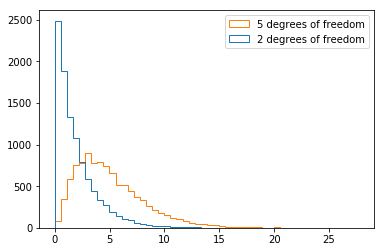

In [67]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [68]:
df = pd.read_csv('grades.csv')

In [69]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [70]:
len(df)

2315

In [71]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [72]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [73]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [74]:
from scipy import stats
stats.ttest_ind?

In [ ]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

In [ ]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

In [ ]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])